In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('train.csv')

# Convert 'Order Date' and 'Ship Date' to datetime format with dayfirst=True
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

# Display the first few rows and check for missing values
print(df.head())
print(df.isnull().sum())



   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Ca

In [5]:
# Fill missing values or drop rows/columns as needed
df['Sales'] = df['Sales'].fillna(df['Sales'].mean())  # Example: Fill missing Sales values with mean



In [7]:
# Summary statistics of numerical columns
print(df.describe())

# Convert categorical columns to category type if needed
df['Category'] = df['Category'].astype('category')
df['Sub-Category'] = df['Sub-Category'].astype('category')
df['Region'] = df['Region'].astype('category')

# Check unique values in categorical columns
print(df['Category'].value_counts())
print(df['Region'].value_counts())



            Row ID                     Order Date  \
count  9800.000000                           9800   
mean   4900.500000  2017-05-01 05:13:51.673469440   
min       1.000000            2015-01-03 00:00:00   
25%    2450.750000            2016-05-24 00:00:00   
50%    4900.500000            2017-06-26 00:00:00   
75%    7350.250000            2018-05-15 00:00:00   
max    9800.000000            2018-12-30 00:00:00   
std    2829.160653                            NaN   

                           Ship Date   Postal Code         Sales  
count                           9800   9789.000000   9800.000000  
mean   2017-05-05 04:17:52.653061120  55273.322403    230.769059  
min              2015-01-07 00:00:00   1040.000000      0.444000  
25%              2016-05-27 18:00:00  23223.000000     17.248000  
50%              2017-06-29 00:00:00  58103.000000     54.490000  
75%              2018-05-19 00:00:00  90008.000000    210.605000  
max              2019-01-05 00:00:00  99301.000000  2

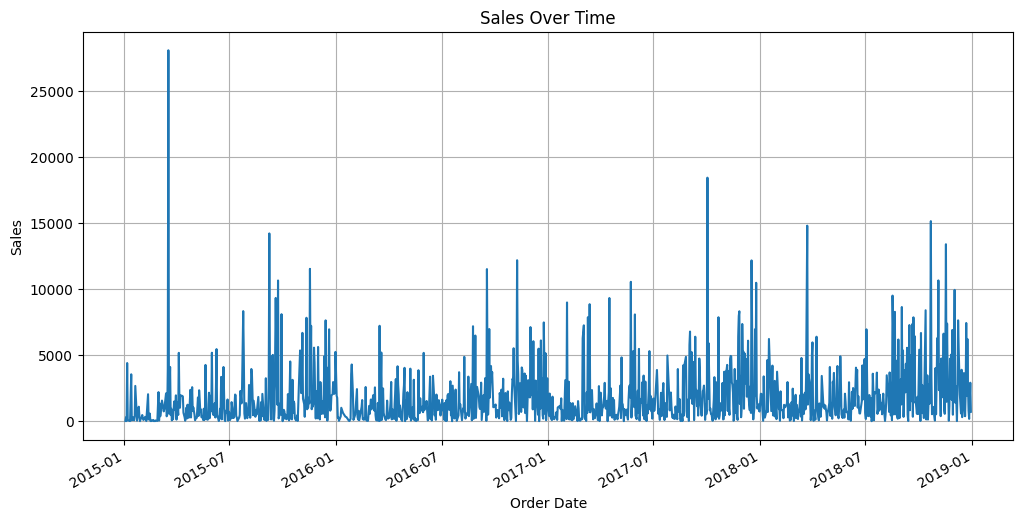

In [9]:
#VISUALIZATION
#Sales performance over time
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot of sales over time
plt.figure(figsize=(12, 6))
df.groupby('Order Date')['Sales'].sum().plot()
plt.title('Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


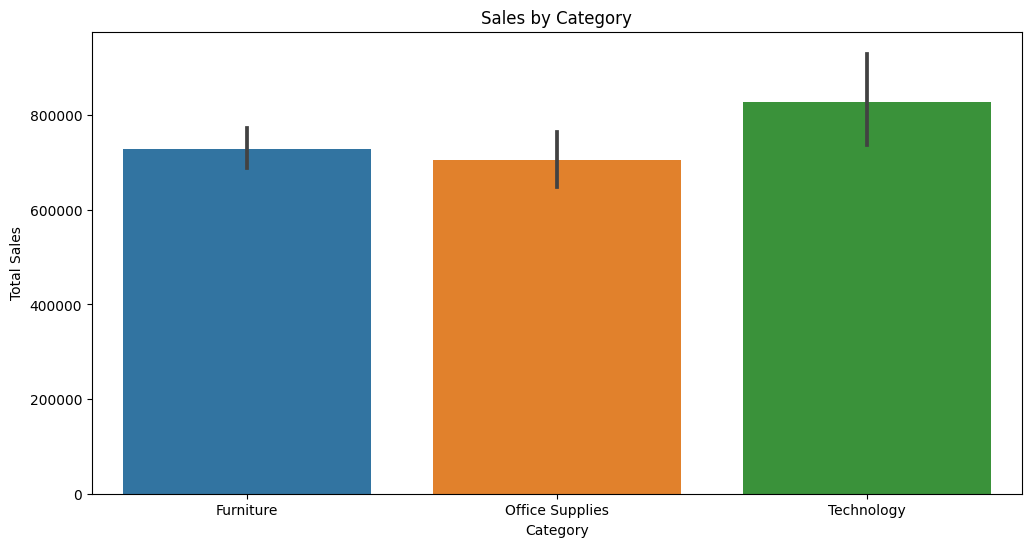

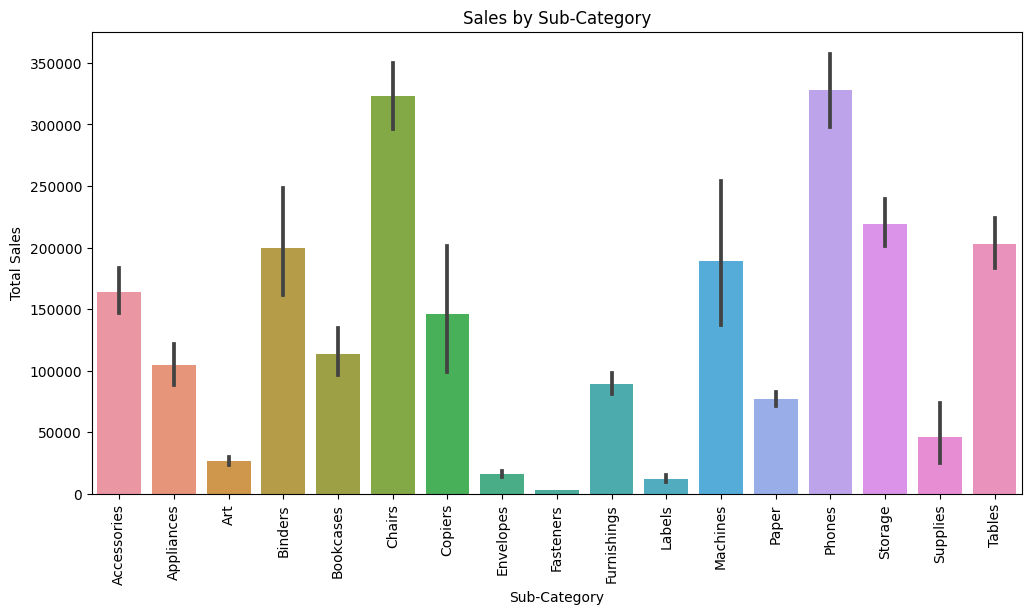

In [11]:
#Sales by Category and Sub-Category
# Bar plot for sales by category
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum)
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

# Bar plot for sales by sub-category
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-Category', y='Sales', data=df, estimator=sum)
plt.title('Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


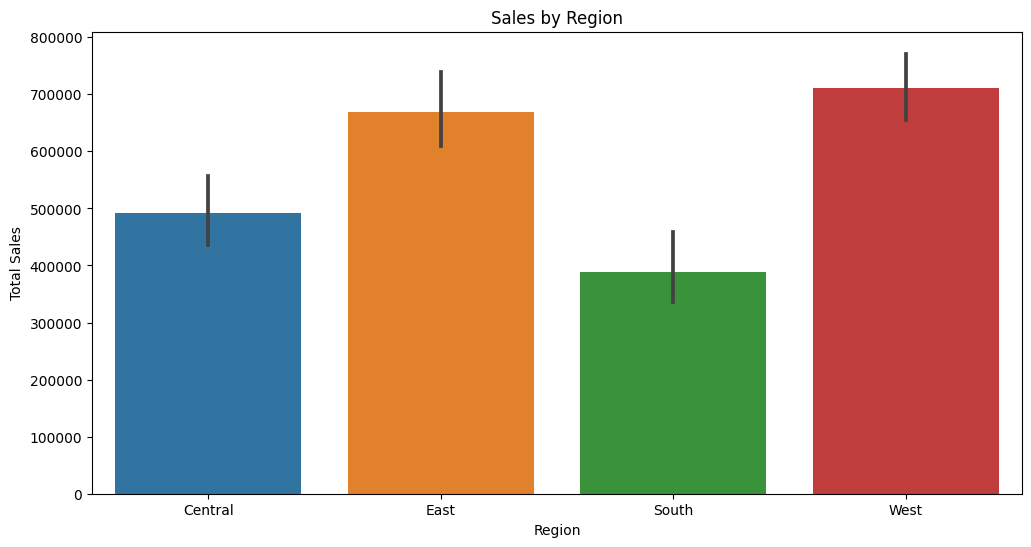

In [15]:
#Geographic Distribution of Sales
# Map visualization of sales by region
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Sales', data=df, estimator=sum)
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()


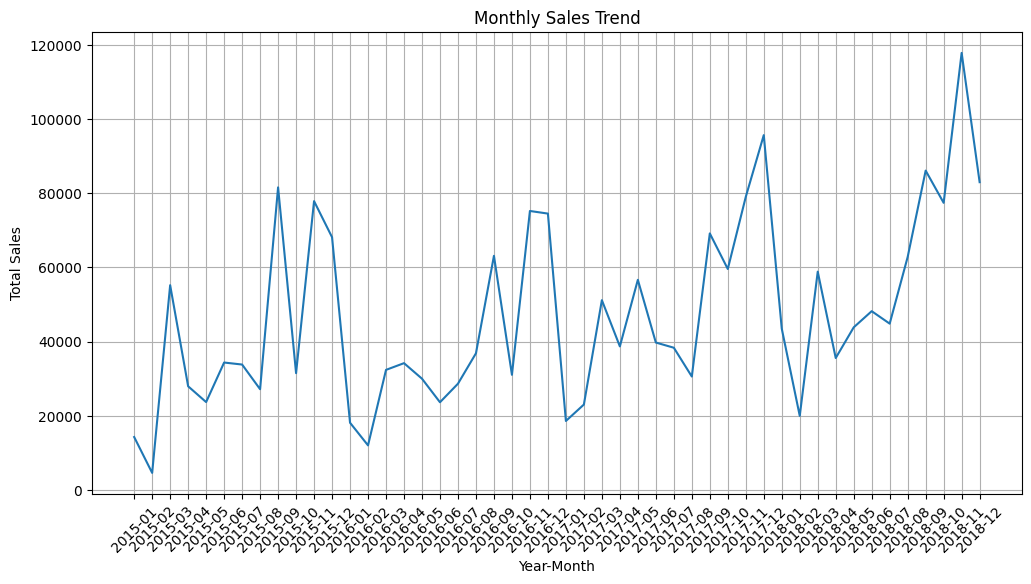

In [25]:
#4. Trend Analysis
# Create a new column for year-month
df['Year-Month'] = df['Order Date'].dt.to_period('M')

# Calculate monthly sales
monthly_sales = df.groupby('Year-Month')['Sales'].sum().reset_index()

# Plot monthly sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Year-Month'].astype(str), monthly_sales['Sales'])
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


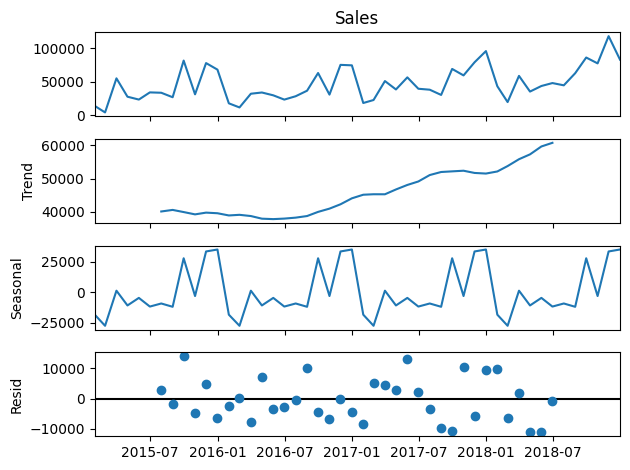

In [27]:
#5. Seasonality Detection
from statsmodels.tsa.seasonal import seasonal_decompose

# Set 'Order Date' as index and resample to monthly frequency
df.set_index('Order Date', inplace=True)
monthly_sales = df['Sales'].resample('M').sum()

# Perform seasonal decomposition
decomposition = seasonal_decompose(monthly_sales, model='additive')
decomposition.plot()
plt.show()

# Extract and plot trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


R-squared: 0.2373434140457703
Mean Squared Error: 254891.61518554614


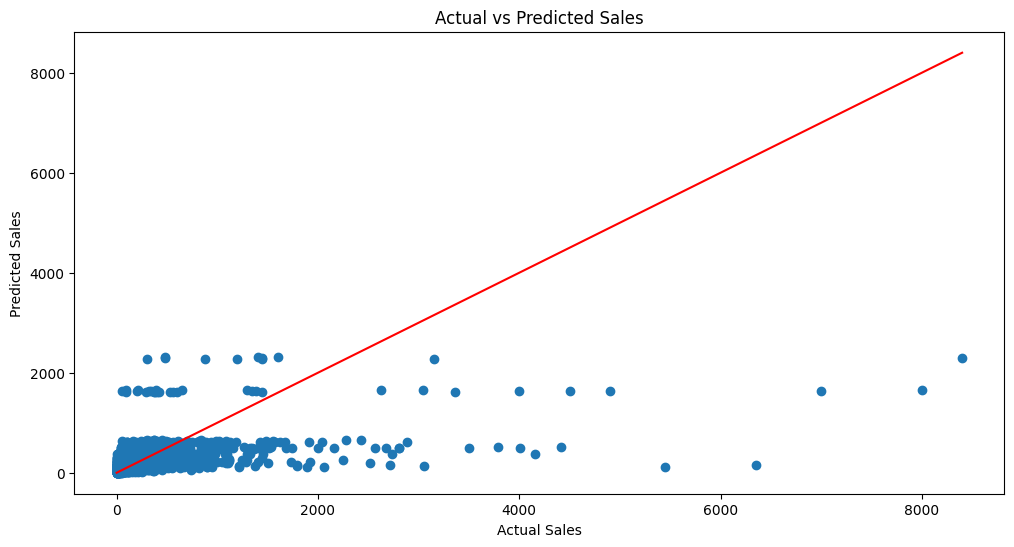

In [33]:
#6. Regression Analysis
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Prepare features and target variable
X = df[['Category', 'Sub-Category', 'Region']]  # Independent variables
y = df['Sales']  # Dependent variable

# Define preprocessing for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Category', 'Sub-Category', 'Region'])
    ]
)

# Define the regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the regression model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f'R-squared: {r2_score(y_test, y_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

# Plot predicted vs actual sales
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

